Lasso and Ridge regression regulization 


Import modules necessary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression

Load the  california housing *dataset*

In [3]:
cali_dataset = datasets.fetch_california_housing()

Convert the dataset into a DataFrame and set the columns and the target variable.

In [4]:
#Load the dataset
cali_pd = pd.DataFrame(cali_dataset.data)
cali_pd.columns = cali_dataset.feature_names
cali_pd_target = np.asarray(cali_dataset.target)
cali_pd['House price'] = pd.Series(cali_pd_target)

#Load input & Ouptut
X = cali_pd.iloc[:, :-1]
Y = cali_pd.iloc[:,-1]

cali_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


split the data into training and testing sets.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.15)

print("Train data shape of X = %s and Y = %s: "%(X_train.shape, Y_train.shape))

print("Test data shape of X = %s and Y = %s: "%(X_test.shape, Y_test.shape))

Train data shape of X = (17544, 8) and Y = (17544,): 
Test data shape of X = (3096, 8) and Y = (3096,): 


Model creation & Fitting to data

In [6]:
# Apply multiple linear regression model
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

# Generate predictions on test set
lreg_y_pred = lreg.predict(X_test)

# Calculating mean squared error(mse)
mse = np.mean((lreg_y_pred - Y_test)**2)
print("Mean squared error on test set: ", mse)

# Putting together the coefficients and their corresponding variable names
lreg_coeff = pd.DataFrame()
lreg_coeff['Columns'] = X_train.columns
lreg_coeff['coeff Estimates'] = pd.Series(lreg.coef_)
print(lreg_coeff)

Mean squared error on test set:  0.5345371244286224
      Columns  coeff Estimates
0      MedInc         0.432773
1    HouseAge         0.009408
2    AveRooms        -0.098336
3   AveBedrms         0.603625
4  Population        -0.000001
5    AveOccup        -0.004863
6    Latitude        -0.421344
7   Longitude        -0.432347


plot the coefficient score

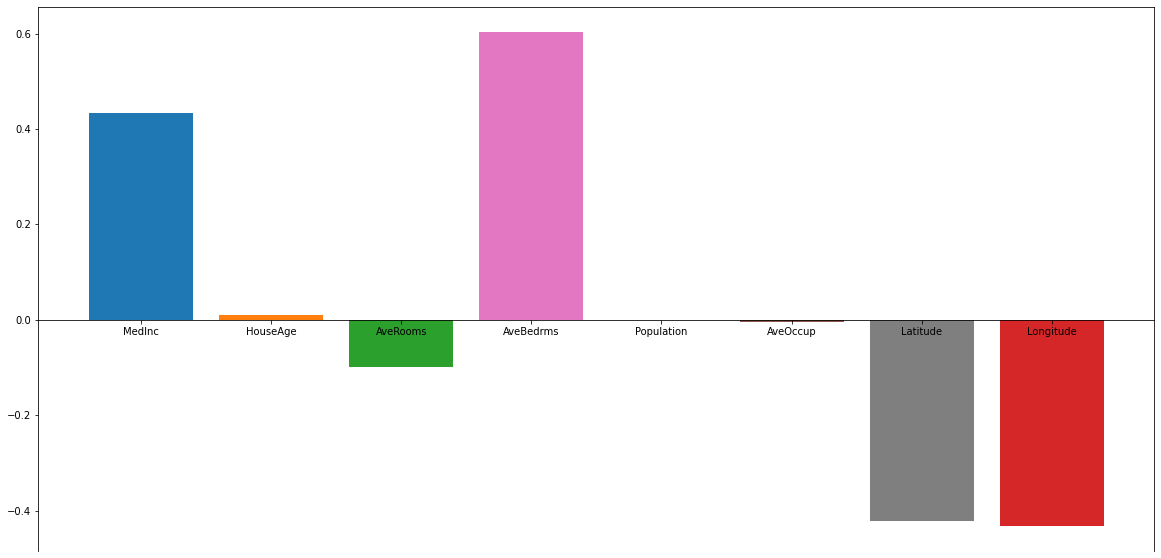

In [7]:
# Plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))

color = ['tab:blue','tab:orange','tab:green',
         'tab:pink','tab:cyan','tab:brown',
         'tab:gray','tab:red']
      
ax.bar(lreg_coeff['Columns'],lreg_coeff['coeff Estimates'],color=color)
ax.spines['bottom'].set_position("zero")
plt.style.use('ggplot')
plt.show()

Let us perform Ridge regression and plot new coefficients that we get from it.

In [8]:
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha=0.7)
ridgeR.fit(X_train, Y_train)
y_pred = ridgeR.predict(X_test)

# Calculating mean squared error(mse)
mse = np.mean((y_pred - Y_test)**2)
print("Mean squared error on test set: ", mse)

# Putting together the coefficients and their corresponding variable names
ridge_coeff = pd.DataFrame()
ridge_coeff['Columns'] = X_train.columns
ridge_coeff['coeff Estimates'] = pd.Series(ridgeR.coef_)
print(ridge_coeff)

Mean squared error on test set:  0.5345530611247767
      Columns  coeff Estimates
0      MedInc         0.432698
1    HouseAge         0.009410
2    AveRooms        -0.098194
3   AveBedrms         0.602875
4  Population        -0.000001
5    AveOccup        -0.004863
6    Latitude        -0.421328
7   Longitude        -0.432321


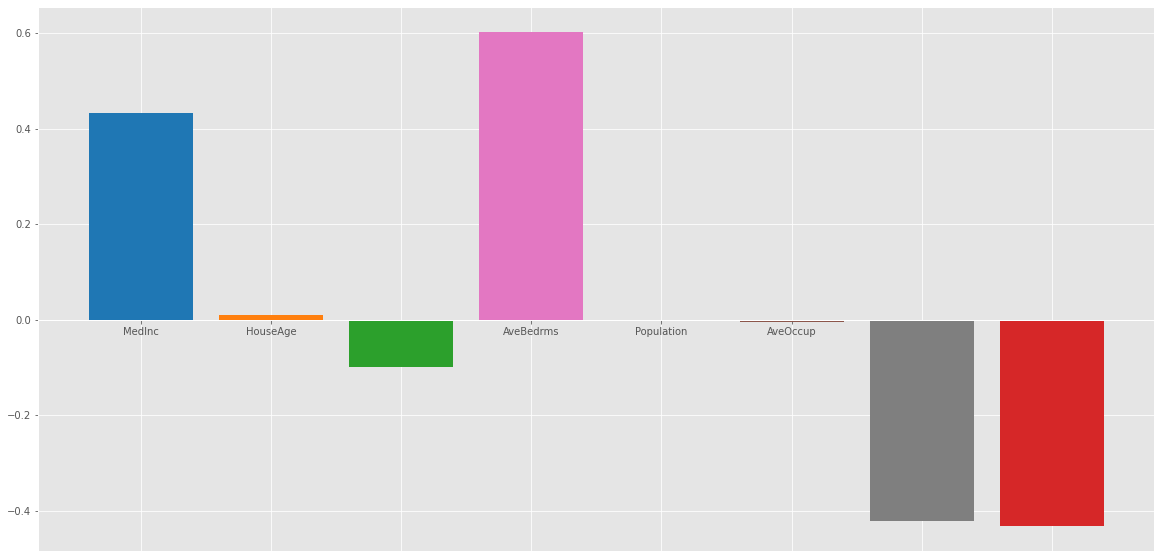

In [9]:
# Plotting the coefficient score  Ridge Regression model
fig, ax = plt.subplots(figsize=(20,10))

color = ['tab:blue','tab:orange','tab:green',
         'tab:pink','tab:cyan','tab:brown',
         'tab:gray','tab:red']
      
ax.bar(ridge_coeff['Columns'],ridge_coeff['coeff Estimates'],color=color)
ax.spines['bottom'].set_position("zero")
plt.style.use('ggplot')
plt.show()

 Lasso Regression and find the coefficients for it

In [10]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha=0.7)
lasso.fit(X_train, Y_train)
y_pred1 = lasso.predict(X_test)

# Calculating mean squared error(mse)
mse = np.mean((y_pred1 - Y_test)**2)
print("Mean squared error on test set: ", mse)

# Putting together the coefficients and their corresponding variable names
lasso_coeff = pd.DataFrame()
lasso_coeff['Columns'] = X_train.columns
lasso_coeff['coeff Estimates'] = pd.Series(lasso.coef_)
print(lasso_coeff)

Mean squared error on test set:  0.8309742608745825
      Columns  coeff Estimates
0      MedInc         0.230991
1    HouseAge         0.009164
2    AveRooms         0.000000
3   AveBedrms        -0.000000
4  Population         0.000006
5    AveOccup        -0.000000
6    Latitude        -0.000000
7   Longitude        -0.000000


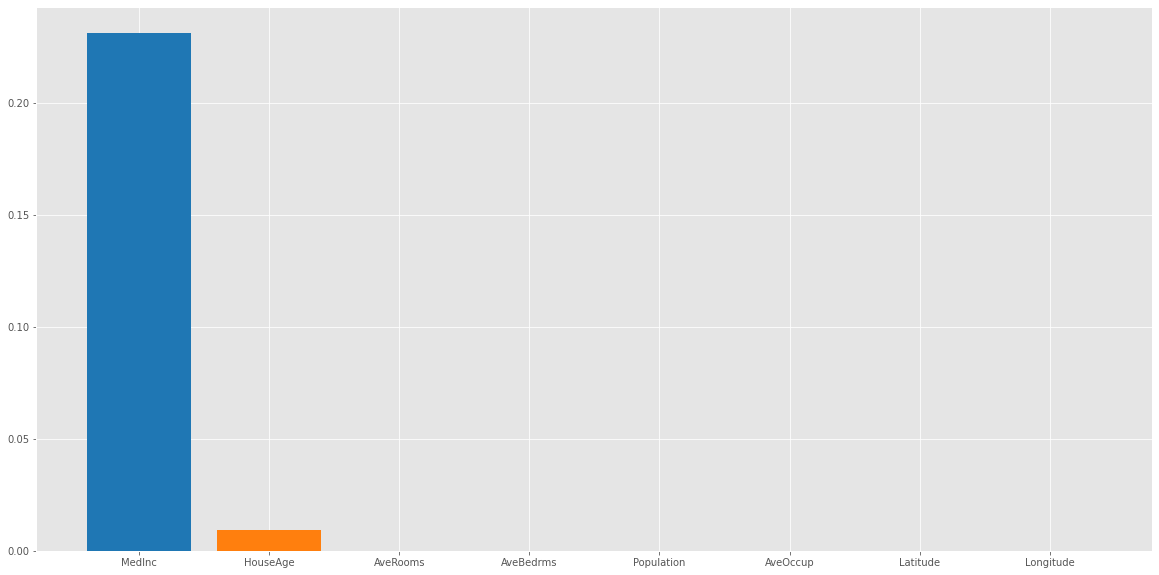

In [11]:
# Plotting the coefficient score Lasso Regression model
fig, ax = plt.subplots(figsize=(20,10))

color = ['tab:blue','tab:orange','tab:green',
         'tab:pink','tab:cyan','tab:brown',
         'tab:gray','tab:red']
      
ax.bar(lasso_coeff['Columns'],lasso_coeff['coeff Estimates'],color=color)
ax.spines['bottom'].set_position("zero")
plt.style.use('ggplot')
plt.show()